Atenção, código abaixo não é meu. Ver READ.me

In [1]:
#Importanto bibliotecas para os gráficos 

import matplotlib
from matplotlib import transforms, pyplot as plt
import numpy as np

%matplotlib inline
#%matplotlib

In [2]:
# Definindo cores por hexadecimais

GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1 = '#F79747'

In [3]:
# Implementando função para escrever textos em cores diferentes: 

def rainbow_text(x, y, text, colors, spacing=20, ax=None, **kw):
    colors = list(reversed(colors))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, line in enumerate(reversed(text.split('\n'))):
        strings = line.split('||')
        for s, c in zip(strings, colors[i]):
            text = ax.text(x, y, s, color=c, transform=t, **kw)
            text.draw(canvas.get_renderer())
            ex = text.get_window_extent()
            t = transforms.offset_copy(text._transform, x=ex.width, 
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * spacing, 
                                   units='dots')

In [4]:
# Fonte Arial para os textos
plt.rcParams['font.family'] = 'Arial'


# Configurando texto itálico e fontes matemáticas para Arial 
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'

In [5]:
# Exemplo de série para o eixo X (lista qualquer)
X = ['Colleague recommendation', 'Previous work together', 
     'Affordability of services', 'National reputation', 
     'Local knowledge', 'Content expertise', 'Demonstration of results']

# Exemplo de série para o eixo Y (lista qualquer)
Y = [3, 16, 18, 20, 45, 55, 70] 

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


Text(-86, -2.5, 'Data source: xyz; includes N number of survey respondents.\nNote that respondents were able to choose up to 3 options.')

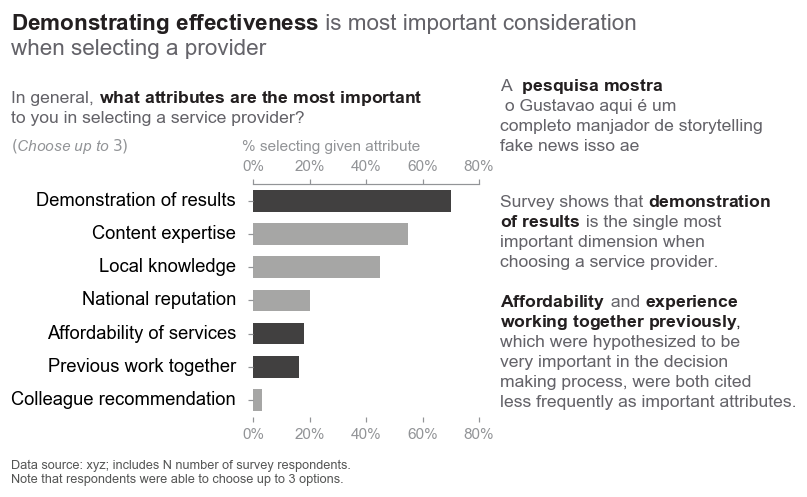

In [6]:
# Criando nova figura
fig, ax1 = plt.subplots(figsize=(8.2, 4.2),  # Largura e altura em polegadas
                        dpi=110)             # Resolução da imagem

# Ajustando o layout (tamanho do subplot)
fig.subplots_adjust(left=0.28, right=0.53, top=0.61, bottom=0.107)

# Desenhando barras horizontais
ax1.barh(range(len(X)),
         Y,
         height=0.65,
         color=[GRAY8] # Ultima linha 
         + [GRAY2]*2 # Duas ultimas linhas 
         + [GRAY8]*3 # Três ultimas linhas 
         + [GRAY2]) # Quatro ultimas linhas 

# Colocando limites para o eixo X e o eixo Y 
ax1.set_xlim([0, 80])
ax1.set_ylim([-0.5, 6.5])

# Priedades dos eixos
plt.setp(ax1,
         xticks=[0, 20, 40, 60, 80],  # 5 x-ticks only 0 and 1
         xticklabels=['0%', '20%', '40%', '60%', '80%'],  # with n% labels
         yticks=np.arange(len(X)),  # tick for all response
         yticklabels=X)  # with text labels

# Change the appearance of ticks, tick labels, and gridlines -> Posicionando o eixo e tirando grade
ax1.tick_params(top='on', bottom='off', left='off', 
                labelbottom='off', labeltop='on')

# configure x tick label appearance
for item in ax1.get_xticklabels():
    item.set_color(GRAY7)

# configure y tick label appearance
for item in ax1.get_yticklabels():
    item.set_fontsize(12)
    # use trasformations to shift y tick labels
    # left y labels slightly right, and right labels slightly left
    offset = transforms.ScaledTranslation(-0.06, 0.02, fig.dpi_scale_trans)
    item.set_transform(item.get_transform() + offset)

# Removendo bordas do gráfico
ax1.tick_params(color=GRAY7)
ax1.spines['top'].set_color(GRAY7)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

# Título do gráfico
rainbow_text(-86, 10.4,
             '$\\bf{Demonstrating\ effectiveness}$||'
             ' is most important consideration\n'
             'when selecting a provider',
             [[GRAY1, GRAY4], [GRAY4]],
             spacing=25,
             ax=ax1,
             fontsize=14.7)

# Resposta da pesquisa
rainbow_text(-86, 8.35,
             'In general, ||$\\bf{what\ attributes\ are\ the\ most\ '
             'important}$\n'
             'to you in selecting a service provider?',
             [[GRAY4, GRAY1], [GRAY4]],
             spacing=20,
             ax=ax1,
             fontsize=11.5)
ax1.text(-86, 7.5, '$\\it{(Choose\ up\ to\ 3)}$', color=GRAY7, fontsize=10)
ax1.text(-4, 7.5, '% selecting given attribute', color=GRAY7, fontsize=10)

# Texto com o resultado da pesquisa
rainbow_text(87.6, 4,
             'Survey shows that ||$\\bf{demonstration}$\n'
             '$\\bf{of\ results}$|| is the single most\n'
             'important dimension when\n'
             'choosing a service provider.',
             [[GRAY4, GRAY1], [GRAY1, GRAY4],
              [GRAY4], [GRAY4]],
             spacing=20,
             ax=ax1,
             fontsize=11.5)

#Essa primeira parte modifica o Survey shows that, até o || . # Modifica o demonstration, depois do || para [[GRAY4,GRAY1]

'''
[GRAY1, GRAY4] # Gray1 modifica o of results e gray4 is the single most,
              [GRAY4], [GRAY4]], #Modifica linhas subsequentes 
'''

# Texto com a hipótese inicial
rainbow_text(87.6, -0.2,
             '$\\bf{Affordability}$|| and ||$\\bf{experience}$\n'
             '$\\bf{working\ together\ previously}$,\n'
             'which were hypothesized to be\n'
             'very important in the decision\n'
             'making process, were both cited\n'
             'less frequently as important attributes.',
             [[GRAY1, GRAY4, GRAY1], [GRAY1],
              [GRAY4], [GRAY4], [GRAY4], [GRAY4]],
             spacing=20,
             ax=ax1,
             fontsize=11.5)

#Para criar o texto: rainbow_text(posição x, posição y, texto, lista da lista de cores, espaçamento, ax, tamanho da fonte)

rainbow_text(87.6, 7.5, 
            'A || $\\bf{pesquisa \ mostra}$|| que \n '
            'o Gustavao aqui é um \n'
            'completo manjador de storytelling\n'
            'fake news isso ae', [[GRAY4,GRAY1],[GRAY4],[GRAY4],[GRAY4]], spacing=20,
            ax=ax1, fontsize=11.5)

# || Atenção: Serve para criar uma string diferente para que a função entenda ao dar as cores
# Para dar Ênfase com negrito || $\\bf{palavra}$
# \ é o espaço

# Fonte do gráfico
ax1.text(-86, -2.5,
         'Data source: xyz; includes N number of survey respondents.\n'
         'Note that respondents were able to choose up to 3 options.',
         fontsize=8.3,
         color=GRAY3)

Text(-86, -2.5, 'Data source: xyz; includes N number of survey respondents.\nNote that respondents were able to choose up to 3 options.')

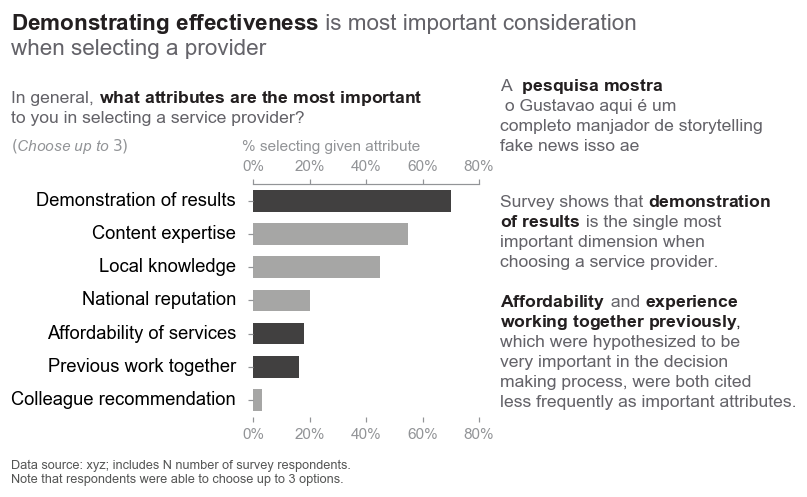

In [7]:
# Aprendendo a configurar os eixos: 

# Criando nova figura
fig, ax1 = plt.subplots(figsize=(8.2, 4.2),  # Largura e altura em polegadas
                        dpi=110)             # Resolução da imagem

# Ajustando o layout (tamanho do subplot)
fig.subplots_adjust(left=0.28, right=0.53, top=0.61, bottom=0.107)

# Desenhando barras horizontais
ax1.barh(range(len(X)),
         Y,
         height=0.65,
         color=[GRAY8] # Ultima linha 
         + [GRAY2]*2 # Duas ultimas linhas 
         + [GRAY8]*3 # Três ultimas linhas 
         + [GRAY2]) # Quatro ultimas linhas 

# Colocando limites para o eixo X e o eixo Y 
ax1.set_xlim([0, 80])
ax1.set_ylim([-0.5, 6.5])

# Priedades dos eixos
plt.setp(ax1,
         xticks=[0, 20, 40, 60, 80],  # 5 x-ticks only 0 and 1
         xticklabels=['0%', '20%', '40%', '60%', '80%'],  # with n% labels
         yticks=np.arange(len(X)),  # tick for all response
         yticklabels=X)  # with text labels

# Change the appearance of ticks, tick labels, and gridlines -> Posicionando o eixo e tirando grade
ax1.tick_params(top='on', bottom='off', left='off', 
                labelbottom='off', labeltop='on')

# configure x tick label appearance (Cor do eixo)
for item in ax1.get_xticklabels():
    item.set_color(GRAY7)

# configure y tick label appearance
for item in ax1.get_yticklabels():
    item.set_fontsize(12)
    # use trasformations to shift y tick labels
    # left y labels slightly right, and right labels slightly left
    offset = transforms.ScaledTranslation(-0.06, 0.02, fig.dpi_scale_trans)
    item.set_transform(item.get_transform() + offset)

# Removendo bordas do gráfico
ax1.tick_params(color=GRAY7)
ax1.spines['top'].set_color(GRAY7)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

# Título do gráfico
rainbow_text(-86, 10.4,
             '$\\bf{Demonstrating\ effectiveness}$||'
             ' is most important consideration\n'
             'when selecting a provider',
             [[GRAY1, GRAY4], [GRAY4]],
             spacing=25,
             ax=ax1,
             fontsize=14.7)

# Resposta da pesquisa
rainbow_text(-86, 8.35,
             'In general, ||$\\bf{what\ attributes\ are\ the\ most\ '
             'important}$\n'
             'to you in selecting a service provider?',
             [[GRAY4, GRAY1], [GRAY4]],
             spacing=20,
             ax=ax1,
             fontsize=11.5)
ax1.text(-86, 7.5, '$\\it{(Choose\ up\ to\ 3)}$', color=GRAY7, fontsize=10)
ax1.text(-4, 7.5, '% selecting given attribute', color=GRAY7, fontsize=10)

# Texto com o resultado da pesquisa
rainbow_text(87.6, 4,
             'Survey shows that ||$\\bf{demonstration}$\n'
             '$\\bf{of\ results}$|| is the single most\n'
             'important dimension when\n'
             'choosing a service provider.',
             [[GRAY4, GRAY1], [GRAY1, GRAY4],
              [GRAY4], [GRAY4]],
             spacing=20,
             ax=ax1,
             fontsize=11.5)

#Essa primeira parte modifica o Survey shows that, até o || . # Modifica o demonstration, depois do || para [[GRAY4,GRAY1]

'''
[GRAY1, GRAY4] # Gray1 modifica o of results e gray4 is the single most,
              [GRAY4], [GRAY4]], #Modifica linhas subsequentes 
'''

# Texto com a hipótese inicial
rainbow_text(87.6, -0.2,
             '$\\bf{Affordability}$|| and ||$\\bf{experience}$\n'
             '$\\bf{working\ together\ previously}$,\n'
             'which were hypothesized to be\n'
             'very important in the decision\n'
             'making process, were both cited\n'
             'less frequently as important attributes.',
             [[GRAY1, GRAY4, GRAY1], [GRAY1],
              [GRAY4], [GRAY4], [GRAY4], [GRAY4]],
             spacing=20,
             ax=ax1,
             fontsize=11.5)

#Para criar o texto: rainbow_text(posição x, posição y, texto, lista da lista de cores, espaçamento, ax, tamanho da fonte)

rainbow_text(87.6, 7.5, 
            'A || $\\bf{pesquisa \ mostra}$|| que \n '
            'o Gustavao aqui é um \n'
            'completo manjador de storytelling\n'
            'fake news isso ae', [[GRAY4,GRAY1],[GRAY4],[GRAY4],[GRAY4]], spacing=20,
            ax=ax1, fontsize=11.5)

# || Atenção: Serve para criar uma string diferente para que a função entenda ao dar as cores
# Para dar Ênfase com negrito || $\\bf{palavra}$
# \ é o espaço

# Fonte do gráfico
ax1.text(-86, -2.5,
         'Data source: xyz; includes N number of survey respondents.\n'
         'Note that respondents were able to choose up to 3 options.',
         fontsize=8.3,
         color=GRAY3)